In [4]:
import pandas as pd
import numpy as np 
import plotly.graph_objs as go
import seaborn as sns 
import matplotlib.pyplot as plt
# import squarify 

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [5]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We obverse that there is a big gap appearing as 75% of price is below \\$175, however, the highest price for an airbnb is \\$10,000
Also, we notice that the lowest price for an airbnb is $0 which does not make sense, theerefore, it suggests that there is Null value in the price column which needed to get grib of 
There is a huge outlier as 75% of minimum night required to stay is 5 days and the max is 1250 days
Outliers also happens in other columns including ( number of reviews, review per month and calculated host listing count)



In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Clean Data

In [6]:
#find missing data 
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see that most missing data were found in the columns of last_review and reviews_per_month, no special treatment is required to handle this missing values as the columnds are not relevant to our analysis. In fact, we will drop columns (id, host_name, last_review) from the data set to increase performance. 

In [7]:
data.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [8]:
data.fillna({'reviews_per_month':0}, inplace = True) #fill value 0 to reviews_per_month

In [30]:
print('Total number of neightbourhood groups: {} - including {}'.format(len(data.neighbourhood_group.unique()),data.neighbourhood_group.unique()))
print('Total number of neightbourhood in the dataset: {}'.format(len(data.neighbourhood.unique())))
print('Total number of room types: {} - including {}'.format(len(data.room_type.unique()), data.room_type.unique()))

Total number of neightbourhood groups: 5 - including ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Total number of neightbourhood in the dataset: 221
Total number of room types: 3 - including ['Private room' 'Entire home/apt' 'Shared room']


### Top 10 Hosts

In [89]:
top_host = data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

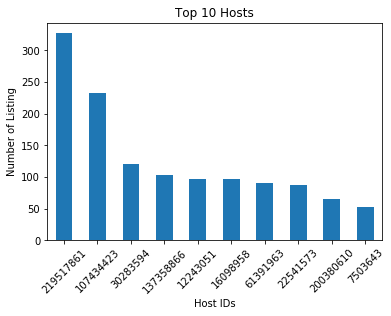

In [19]:
top_host_plot = top_host.plot(kind='bar')
top_host_plot.set_title("Top 10 Hosts")
top_host_plot.set_ylabel("Number of Listing")
top_host_plot.set_xlabel("Host IDs")
top_host_plot.set_xticklabels(top_host_plot.get_xticklabels(), rotation=45)

As we can see that the top host has hosted a total of 327 times. We can clearly see that the gap between the top host and other hosts. It might be interesting to investigation further more on this such as number of listing and area for the top host. 

In [85]:
top_10 = data[data['host_id'].isin(top_host.index)]
top_10_listing = top_10.groupby('host_id').latitude.nunique().reset_index()
top_10_listing.sort_values(by=['latitude'])

,host_id,latitude
0,7503643,47
8,200380610,65
3,22541573,83
5,61391963,90
1,12243051,91
2,16098958,96
7,137358866,101
4,30283594,115
6,107434423,225
9,219517861,245


In [90]:
top_host = top_host.reset_index()
top_host = top_host.rename(columns={'host_id':'total_host', 'index':'host_id'})
top_host

,host_id,total_host
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [92]:
top_10_listing = top_10_listing.rename(columns={'latitude':'total_listing'})
top_10_listing

,host_id,total_listing
0,7503643,47
1,12243051,91
2,16098958,96
3,22541573,83
4,30283594,115
5,61391963,90
6,107434423,225
7,137358866,101
8,200380610,65
9,219517861,245


In [94]:
top_10_host = top_host.merge(top_10_listing, how='inner', on = 'host_id')
top_10_host

,host_id,total_host,total_listing
0,219517861,327,245
1,107434423,232,225
2,30283594,121,115
3,137358866,103,101
4,12243051,96,91
5,16098958,96,96
6,61391963,91,90
7,22541573,87,83
8,200380610,65,65
9,7503643,52,47


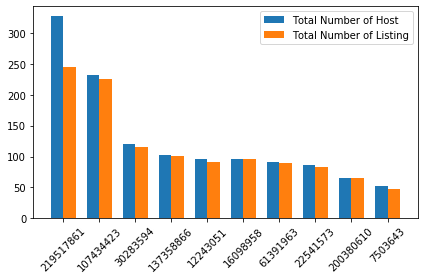

In [100]:
x = np.arange(len(top_10_host))
width = 0.35

fig, ax = plt.subplots()
total_host = ax.bar(x- width/2, top_10_host['total_host'], width, label = 'Total Number of Host')
total_list = ax.bar(x+ width/2, top_10_host['total_listing'], width, label = 'Total Number of Listing')

# ax.set_ylabel('')
ax.set_xticks(x)
ax.set_xticklabels(top_10_host['host_id'], rotation = 45)
ax.legend()

# ax.bar_label(total_host, padding=3)
# ax.bar_label(total_list, padding=3)

fig.tight_layout()

plt.show()

In [20]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=data.loc[data['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=data.loc[data['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=data.loc[data['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=data.loc[data['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=data.loc[data['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [21]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

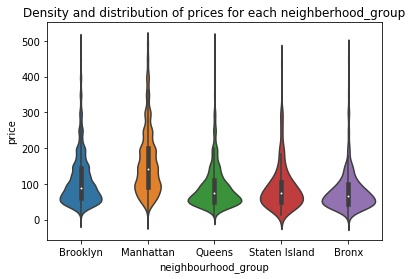

In [23]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=data[data.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Above image clearly shows that Manhattan has the highest range of prices for the listing with an average price of \\$150 followed by Brooklyn with \\$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. 

### Top 10 neighbourhoods

In [9]:
data.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

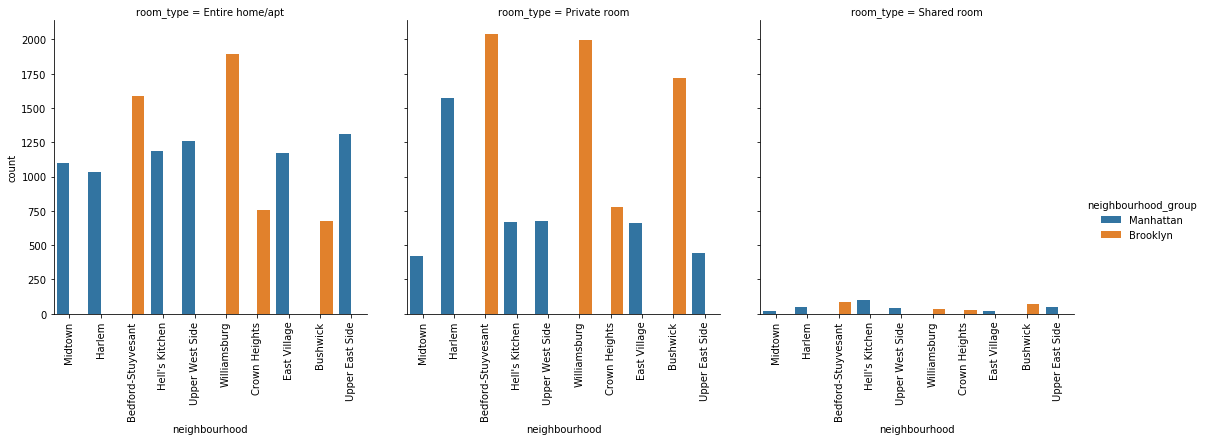

In [24]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

### Let's Map It

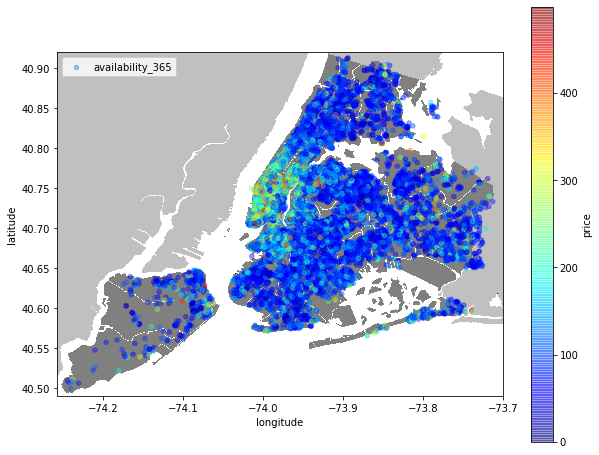

In [28]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [29]:
sub_66 = data[data.price < 1000]

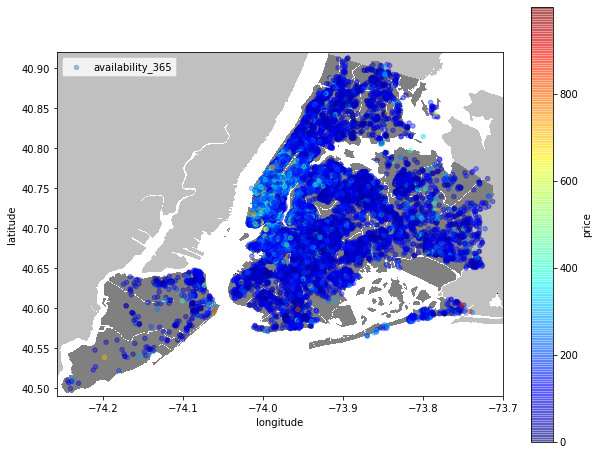

In [32]:
plt.figure(figsize=(10,8))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub_66.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()